# Interviewing the data: 
### It’s important to know what you are getting into- 

Let’s being with brutal honesty. I didn’t know this data set existed. I spent a good amount of time reading the IIPS website, then the DHS website and by the time I came back to the NFHS I knew a lot more about Somali mothers than I thought I would ever need. But in all my travels over the world wide web, I was unable to find the data dictionary for the NFHS-4. Upon reading the individual state fact sheets, we can get a sense of the data and by going through the questionnaire we can see how the information was obtained from the sample. Going through all the material on the website will give us a multidimensional understanding of the data and all the further steps in the analysis will be more informed. 

### Getting into it:
I used a combination of Pandas and Excel to pull and push the data. 

### Looking at it in Excel first

This may not always be the right thing to do because Excel sometimes modifies the data to make it look good. It eats up trailing zero and changes the formats of some the columns.
But I did look at the sheets the data was scraped from and there didn’t seem to be any of the above issues, so I trustingly opened the data in Excel. 

A few filters and pivot tables later, I found that in the state data, all of  West Bengal was repeated twice. I redownloaded the data from GitHub and checked again. 

![excel_shot](excel.png)

So, I deleted the duplicates and continued

### Using Pandas
I used the master statewide sheet to make sectioned out CSVs to analyse in python. 

* Wb1 has no duplicate West Bengal data and all the names of the indicators along with the values.
* Wb2 has no duplicate West Bengal and all the indicatory keys instead of the names, plus the values. 

### Load the data into a pandas data frame


In [1]:
import seaborn as sb #for vizulisations
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv("wb1.csv")

In [65]:
#sb.pairplot(df) 
'''Pair plot takes too long to run on 114 varibles. It kept crashing on my laptop'''

'Pair plot takes too long to run on 114 varibles. It kept crashing on my laptop'

Run a correlation on all the indicators to see which depend on each other. Then run the correlation matrix as a heat map to produce a visual that we can analyze easier. 

In [3]:
corr = df.corr()

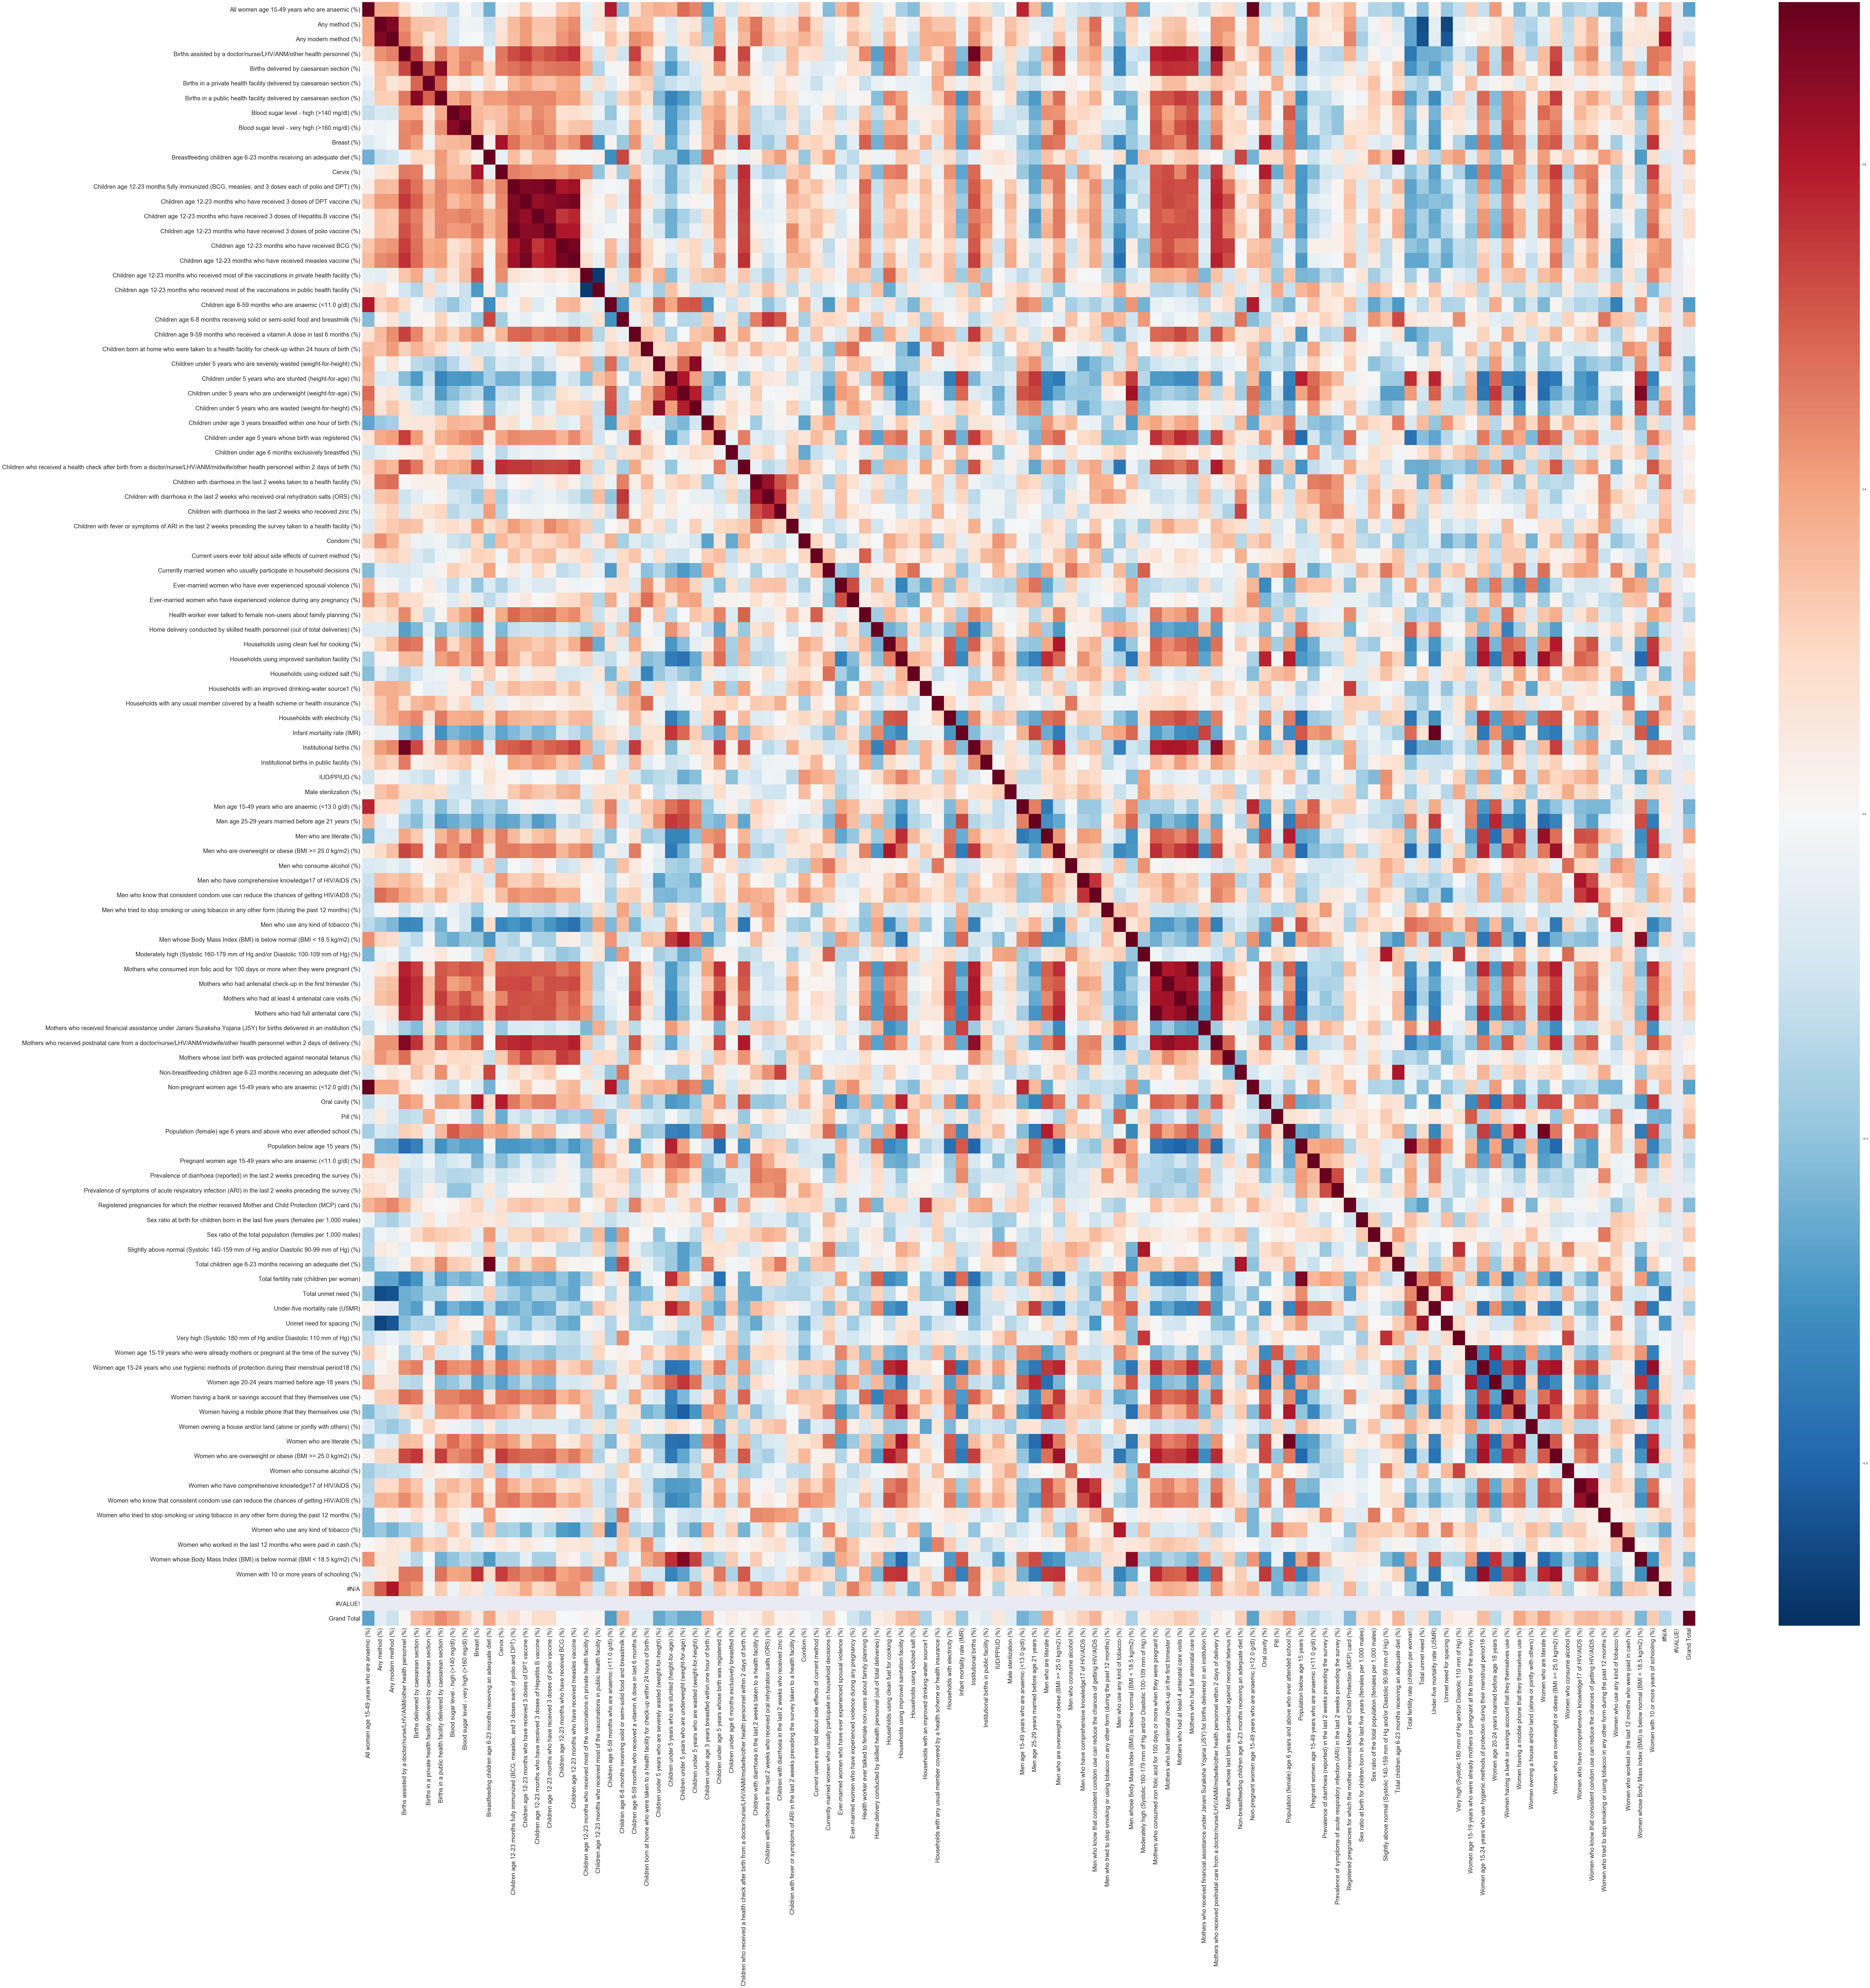

In [4]:
plt.subplots(figsize=(100,100))

h_map = sb.heatmap(corr)
h_map.tick_params(labelsize=20)

Close examination of this image does yield some interesting results like: 
* Men who used any kind of tobacco are inversely correlated to men who are obese
* Households with electricity use clean cooking fuel. 


### Looking at Obesity:

Overweight women

- had C-sections 
- live in households that use clean fuel for cooking 
- live in households that have improved sanitation 
- live in households that have electricity 
- give birth in institutions 
-  negatively related to men who use tobacco 
- have or get antenatal care 
- inversely related to mothers who received financial assistance JSY( for poor pregnant women) 
- have oral cavities 
- inversely related to the population below 15 years old 
-  use hygienic methods for periods
- inversely related to married before 18
- have bank accounts that they use
- have a mobile phone 
-  are literate
- have had10 or more years of schooling 


![men and women](isolated.jpg)

You can see that the factors that relate to women being obese are the same that relate to men being obese. 
We can also see that these factors somewhat indicate that economically well-off people are obese.

### Looking at rural an urban population

* women.csv is a slice from the the state-wise master that has only the urban, rural an total populations of women who are obese


In [5]:
women = pd.read_csv("women.csv")

In [6]:
women

,state,urban,rural,total
0,Andaman and Nicobar Islands,38.3,26.6,31.8
1,Andhra Pradesh,45.6,27.6,33.2
2,Arunachal Pradesh,25.7,16.3,18.8
3,Assam,26.1,10.9,13.2
4,Bihar,23.5,9.7,11.7
5,Chandigarh,0.0,0.0,41.5
6,Chhattisgarh,24.4,7.8,11.9
7,Dadra and Nagar Haveli,34.2,6.9,19.2
8,Daman and Diu,32.7,29.0,31.6
9,Delhi,34.9,29.2,34.9


In [7]:
women["diff"]= women['urban'] - women['rural'].head() # calculating the differecne between the rural an urban population and storing that as a separate column

In [8]:
women

,state,urban,rural,total,diff
0,Andaman and Nicobar Islands,38.3,26.6,31.8,11.7
1,Andhra Pradesh,45.6,27.6,33.2,18.0
2,Arunachal Pradesh,25.7,16.3,18.8,9.4
3,Assam,26.1,10.9,13.2,15.2
4,Bihar,23.5,9.7,11.7,13.8
5,Chandigarh,0.0,0.0,41.5,NaN
6,Chhattisgarh,24.4,7.8,11.9,NaN
7,Dadra and Nagar Haveli,34.2,6.9,19.2,NaN
8,Daman and Diu,32.7,29.0,31.6,NaN
9,Delhi,34.9,29.2,34.9,NaN


The differences are all positive numbers, i.e there are more obese women living in urban areas

In [9]:
women.describe() # for a better understanding of the data

,urban,rural,total,diff
count,36.000000,36.000000,36.000000,5.00000
mean,30.216667,18.163889,23.908333,13.62000
std,8.403010,8.655111,8.802609,3.28664
min,0.000000,0.000000,10.300000,9.40000
25%,24.375000,11.950000,16.425000,11.70000
50%,31.900000,16.150000,23.350000,13.80000
75%,35.225000,26.850000,31.375000,15.20000
max,45.600000,33.600000,41.500000,18.00000


In [10]:
women.sort_values('total', ascending=True).head() # sorting by the least obese states

,state,urban,rural,total,diff
15,Jharkhand,21.7,5.9,10.3,NaN
4,Bihar,23.5,9.7,11.7,13.8
6,Chhattisgarh,24.4,7.8,11.9,NaN
22,Meghalaya,18.4,10.2,12.2,NaN
3,Assam,26.1,10.9,13.2,15.2


In [66]:
women.sort_values('total', ascending=False).head() # sorting by the most obese states


,state,urban,rural,total,diff
5,Chandigarh,0.0,0.0,41.5,NaN
18,Lakshadweep,42.4,28.2,41.4,NaN
26,Puducherry,38.1,33.6,36.7,NaN
9,Delhi,34.9,29.2,34.9,NaN
10,Goa,36.3,28.5,33.5,NaN


Running the same process for men

In [12]:
men = pd.read_csv("men.csv")

In [13]:
men["diff"]= men['urban'] - men['rural']

In [14]:
men.describe()

,urban,rural,total,diff
count,36.000000,36.000000,36.000000,36.000000
mean,26.330556,16.819444,21.713889,9.511111
std,8.528400,9.128224,8.094166,6.310027
min,0.000000,0.000000,10.100000,-4.500000
25%,20.475000,10.575000,14.150000,4.950000
50%,25.950000,15.350000,20.800000,9.350000
75%,31.375000,22.900000,27.900000,13.400000
max,44.400000,38.300000,38.200000,24.100000


In [15]:
men.sort_values('total', ascending=False).head() #sorting for most obese

,state,urban,rural,total,diff
0,Andaman and Nicobar Islands,38.0,38.3,38.2,-0.3
26,Puducherry,40.5,30.8,37.1,9.7
29,Sikkim,41.5,29.7,34.8,11.8
1,Andhra Pradesh,44.4,28.0,33.5,16.4
10,Goa,35.3,28.2,32.6,7.1


In [16]:
men.sort_values('total', ascending=True).head() # sorting for least obese

,state,urban,rural,total,diff
22,Meghalaya,17.1,8.1,10.1,9.0
6,Chhattisgarh,20.0,6.8,10.2,13.2
19,Madhya Pradesh,17.6,7.8,10.9,9.8
15,Jharkhand,19.8,7.5,11.1,12.3
33,Uttar Pradesh,20.6,9.0,12.5,11.6


We also see that __Chhattisgarh, Jharkhand and Meghalaya__ come in the bottom five obese states for women and men. Similarly  __Puducherry and Goa__ come in the top five obese states for both men and women.

But is this enough to prove our hypothesis? 

### Bringing in RBI data 
The RBI has [state level data](https://www.rbi.org.in/scripts/PublicationsView.aspx?id=17295) for the number and percentage of population below poverty line. The data had to be cleaned a bit. The latest available data was for 2011-2012 but it can still give us a snapshot.



In [17]:
pl = pd.read_csv("rbi_poverty.csv")

In [18]:
pl

,state Territory,rural,rpl,urban,upl,total
0,Andhra Pradesh,11.0,860,5.8,1009,9.2
1,Arunachal Pradesh,38.9,930,20.3,1060,34.7
2,Assam,33.9,828,20.5,1008,32.0
3,Bihar,34.1,778,31.2,923,33.7
4,Chhattisgarh,44.6,738,24.8,849,39.9
5,Goa,6.8,1090,4.1,1134,5.1
6,Gujarat,21.5,932,10.1,1152,16.6
7,Haryana,11.6,1015,10.3,1169,11.2
8,Himachal Pradesh,8.5,913,4.3,1064,8.1
9,Jammu & Kashmir,11.5,891,7.2,988,10.4


In [20]:
pl.describe()

,rural,urban,total
count,36.000000,36.000000,36.000000
mean,20.861111,13.005556,18.591667
std,14.595484,8.221503,11.426895
min,0.000000,0.000000,1.000000
25%,10.725000,6.475000,9.850000
50%,16.800000,10.400000,15.650000
75%,33.950000,18.050000,29.975000
max,62.600000,32.600000,39.900000


In [21]:
pl.sort_values('total', ascending=True).head() #sorting for smallest percent of population below poverty line

,state Territory,rural,rpl,urban,upl,total
28,Andaman & Nicobar Islands,1.6,.,0.0,.,1.0
33,Lakshwadeep,0.0,.,3.4,.,2.8
5,Goa,6.8,1090,4.1,1134,5.1
12,Kerala,9.1,1018,5.0,987,7.1
8,Himachal Pradesh,8.5,913,4.3,1064,8.1


Jharkhand and Chhattisgarh are among the states that have the highest population below the property line. Goa is in the top five states that have 5 percent or less of their population below the poverty line.
With this data we can say that __states that have a higher population above the poverty line also tend to have an obese population__

### Time series
We know that the survey was conducted every 10 years. It would make sense to look at obesity since 1992. The [2016-2015]( http://rchiips.org/NFHS/pdf/NFHS4/India.pdf) all India fact sheet has a column titled __“NFHS-3 (2005-06)”__. Just to make sure I checked the [2005-2006]( http://rchiips.org/NFHS/pdf/India.pdf) all India fact sheet.  __The Numbers Didn’t Match__


__NFHS-4:__
![nfhs4 on 3](nfhs4_on3.png)

The Data in this report suggests that __12.6% of women surveyed__ and __9.3% of men surveyed__ in 2005-2006 were obese.
While the 2005-2006 report suggests  that __14.8% women surveyed__ and __12.1% of men surveyed__ in 2005 were obese. 


__NFHS-3:__

![nfhs4 on 3](nfhs3_on3.png)


Taking the data from the individual reports: 
- time.csv was made for the bar chart 



In [ ]:
time = pd.read_csv("time.csv")

In [63]:
time

,year,Value,sex
5,1998-1999,0.0,Men
4,2005-2006,12.1,Men
3,2015-2016,18.6,Men
2,1998-1999,10.6,Women
1,2005-2006,14.8,Women
0,2015-2016,20.7,Women


In [61]:
time = time.iloc[::-1] # Reversing the order of the rows

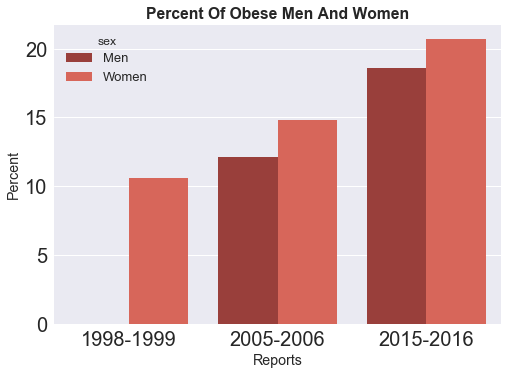

In [62]:
sb.set(font_scale=1.3)
bar = sb.barplot(x="year", y="Value", hue="sex", data=time,palette="Reds_d")
bar.set(xlabel='Reports', ylabel='Percent')
bar.set_title("Percent Of Obese Men And Women", fontweight='bold')
bar.tick_params(labelsize=20)


# Conclusion 

As we can see the obese population of the country has been on the rise since the 90’s. 

## This trend has a lot of reporting potential. 
-  We briefly explored the hypotheses that obesity is inversely related to poverty.  This can be further explored with interviews and additional data

-  We can also look at relating obesity to morbidity

- Reports may choose to explore the most and the least obese states in the country

- Analysis can also be done at the state level. We can use GIS data to look at adjacent districts to see if they match a pattern or we may find a few districts that are anomalies. I.e., the districts around them are obese but they are not or the other way around.

- If the data is to be trusted, we can do a time-lapse image to show how obesity has increased at the state or district level – using state shapefiles. 
